# K-Means Clustering

## Main Task
> Dividing the customer base into several groups of individuals that share a similarity in different ways that are relevant to marketing such as gender, age, interests, and miscellaneous spending habits.

### Data Understanding  

**1.0. What is the domain area of the dataset?**  
The dataset *Mall_Customers.csv* contains information about people visiting the mall. The dataset has gender, customer id, age, annual income, and spending score.

**2.0. Which data format?**  
The dataset is in *csv* format!  

**2.1. Do the files have headers or another file describing the data?**  
The files does have headers that describes the data! Each column has a name that describes the data it contains!  

**2.2. Are the data values separated by commas, semicolon, or tabs?**  
The data values are separated by commas!  
Example: 
*CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)*
*0001,Male,19,15,39*

**3.0 How many features and how many observations does the dataset have?**  
The dataset has:  
* 5 features or columns!
* 200 observations or rows!  

**4.0 Does it contain numerical features? How many?**  
Yes it contains 3 numerical features!  

**5.0. Does it contain categorical features?  How many?**  
Yes it contains 1 categorical features! (Gender feature (male/female))  

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
dataset = pd.read_csv("../..//Datasets/Mall_Customers.csv")

In [25]:
RANDOM_STATE = 42

In [4]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [27]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [28]:
print(f"Number of features in the dataset is {dataset.shape[1]} and the number of observations/rows in the dataset is {dataset.shape[0]}")

Number of features in the dataset is 5 and the number of observations/rows in the dataset is 200


### Handling Missing Values

In [29]:
dataset.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
dataset.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Model Building
### Data Pre-Processing

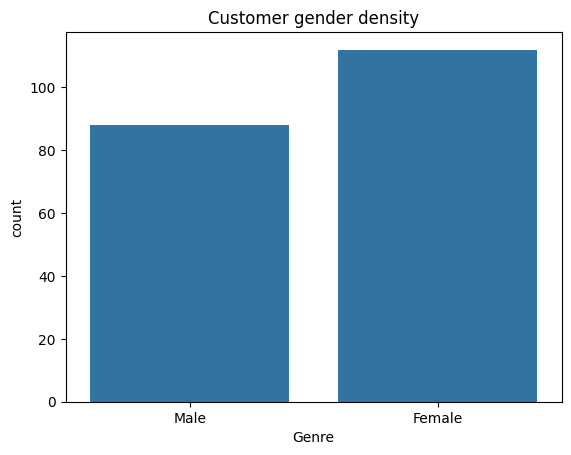

In [31]:
sns.countplot(x='Genre', data=dataset)
plt.title('Customer gender density')
plt.show()

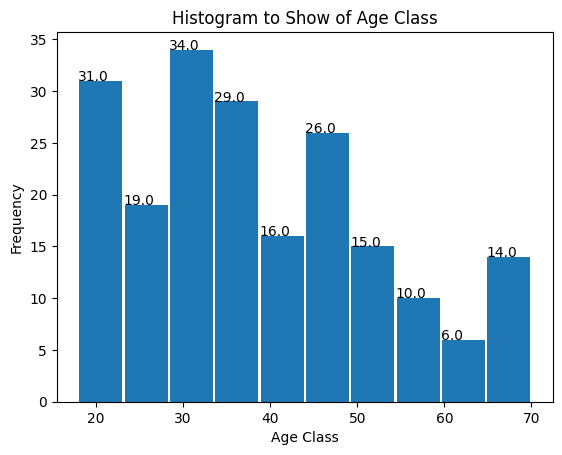

In [32]:
my_bins=10
# Histogram used by deafult 10 bins . bins like range.
arr=plt.hist(dataset['Age'],bins=my_bins, rwidth=0.95) 
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.title('Histogram to Show of Age Class')
for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

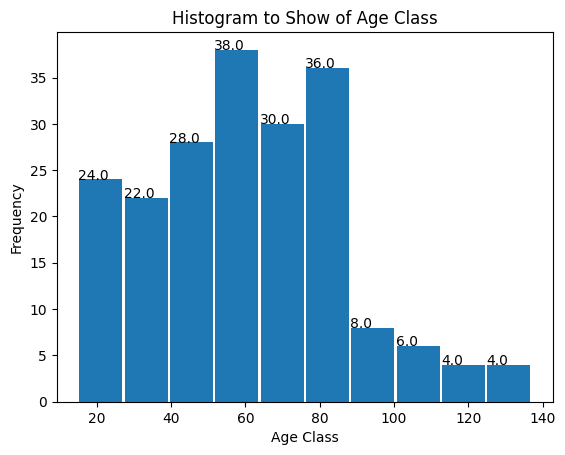

In [33]:
my_bins=10
# Histogram used by deafult 10 bins . bins like range.
arr=plt.hist(dataset['Annual Income (k$)'],bins=my_bins, rwidth=0.95) 
plt.xlabel('Age Class')
plt.ylabel('Frequency')
plt.title('Histogram to Show of Age Class')
for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

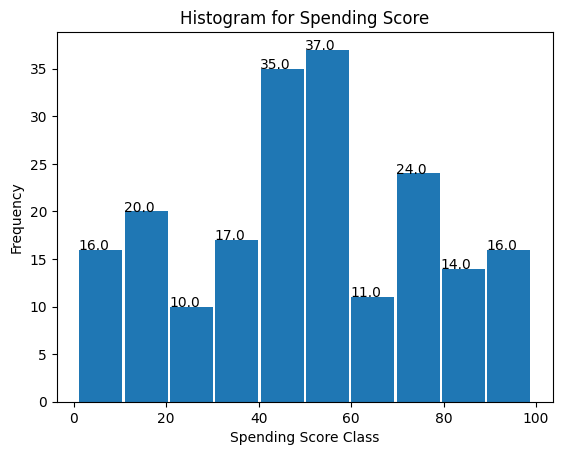

In [34]:
my_bins=10
# Histogram used by deafult 10 bins . bins like range.
arr=plt.hist(dataset['Spending Score (1-100)'],bins=my_bins, rwidth=0.95) 
plt.xlabel('Spending Score Class')
plt.ylabel('Frequency')
plt.title('Histogram for Spending Score')
for i in range(my_bins):
    plt.text(arr[1][i],arr[0][i],str(arr[0][i]))

In [35]:
X = dataset.iloc[:, [3, 4]].values

### Finding the number of clusters

In [37]:
wcss = []
silhouette_scores = []
# Measures how similar each point is to points in its own cluster compared to points in other clusters. Higher scores indicate better clustering.

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=RANDOM_STATE)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))


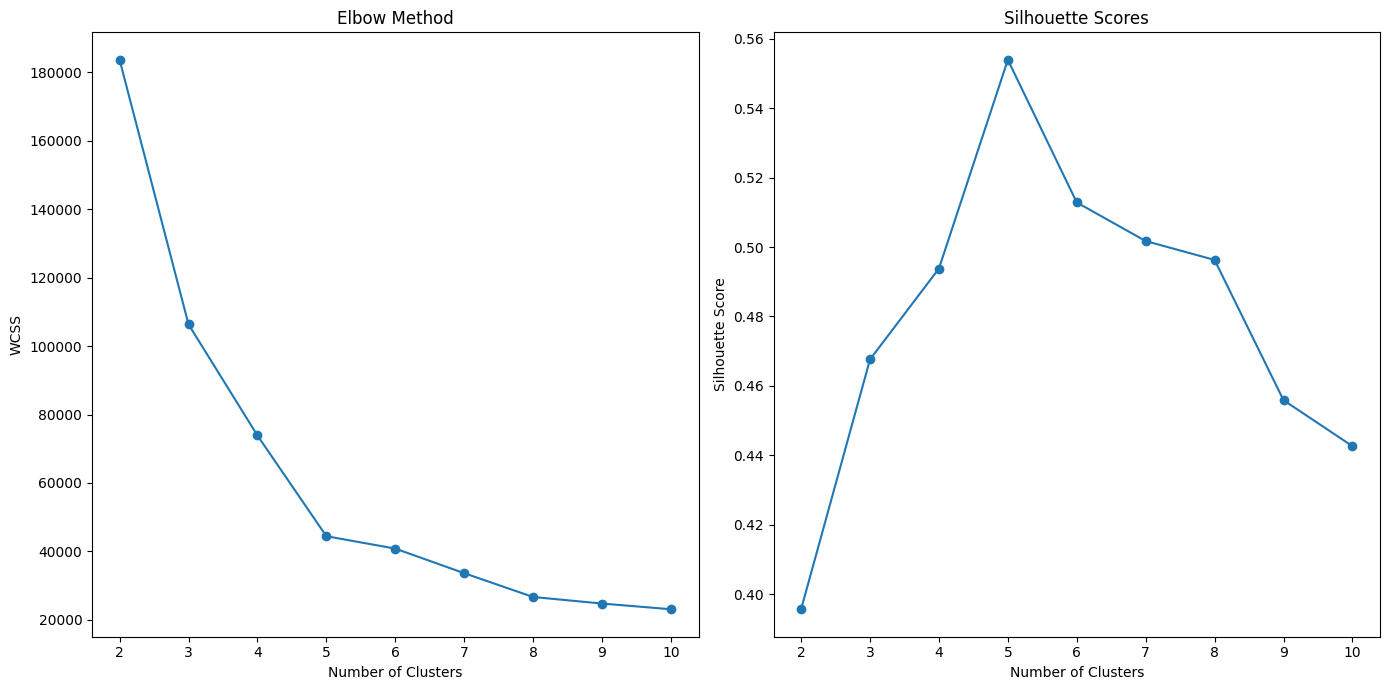

In [39]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

### Training the model

In [40]:
# n_clusters = 5 based on the Elbow Method and Silhouette score
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=RANDOM_STATE)
y_kmeans = kmeans.fit_predict(X)

### Visualizing the results

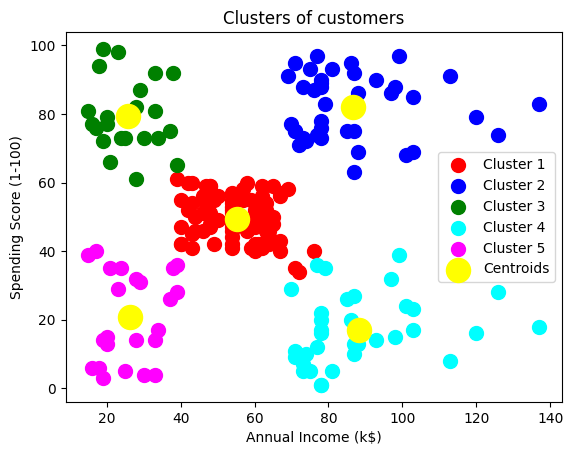

In [41]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()